# Autocomplete and Autocorrect Data Analytics 

### Description:



##### Explore the efficiency and accuracy of autocomplete and autocorrect algorithms in natural language processing (NLP) through this data analytics project. The objective is to enhance user experience and text prediction by analyzing large datasets and implementing or optimizing autocomplete and autocorrect functionalities.

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset


In [35]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [36]:
# Placeholder text column for demonstration purposes
df['text'] = "This is a placeholder text for NLP processing in the project. This text will be replaced by actual data in real scenarios."

# Function to clean and normalize text

In [39]:
def preprocess_text(text):
    """
    Clean and normalize the text data.
    1. Convert text to lowercase.
    2. Remove punctuation and numbers.
    3. Tokenize the text.
    4. Remove stop words.
    """
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

In [41]:
# Apply preprocessing to the text column
df['tokens'] = df['text'].apply(preprocess_text)

In [42]:
# Example of normalization
df['normalized_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [43]:
# Display the preprocessed tokens and normalized text
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.098698  0.363787  ...  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1  0.085102 -0.255425  ... -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.247676 -1.514654  ... -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.377436 -1.387024  ... -1.175575  0.647376 -0.221929  0.062723  0.061458   
4 -0.270533  0.817739  ...  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class                

# Autocomplete Implementation

In [44]:
def train_bigram_model(tokens):
    """
    Train a bigram model to predict the next word based on the current word.
    """
    model = defaultdict(lambda: defaultdict(lambda: 0))
    for token_list in tokens:
        for i in range(len(token_list)-1):
            model[token_list[i]][token_list[i+1]] += 1
    return model

In [45]:
# Train the bigram model
bigram_model = train_bigram_model(df['tokens'])

In [46]:
# Function to predict the next word
def predict_next_word(model, word):
    """
    Predict the next word given the current word using the bigram model.
    """
    next_word_candidates = model[word]
    if next_word_candidates:
        return max(next_word_candidates, key=next_word_candidates.get)
    return None

# Autocorrect Implementation

In [23]:
# Optimizing algorithms for spelling error correction using edit distance

def edit_distance(word1, word2):
    dp = np.zeros((len(word1)+1, len(word2)+1), dtype=int)
    for i in range(len(word1)+1):
        for j in range(len(word2)+1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i-1] == word2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[len(word1)][len(word2)]

In [47]:
# Example usage of edit distance
print(edit_distance("example", "samples"))

3


# Performance Metrics

In [49]:
# Placeholder values for demonstration (Replace with actual values in a real scenario)
true_autocomplete = ['word1', 'word2', 'word3']  # Actual words
predicted_autocomplete = ['word1', 'word2', 'word4']  # Predicted words

true_autocorrect = ['spelling', 'error', 'corrected']  # Actual corrected words
predicted_autocorrect = ['speling', 'eror', 'correctd']  # Predicted corrected words

In [50]:
# Autocomplete Metrics
accuracy_autocomplete = accuracy_score(true_autocomplete, predicted_autocomplete)
precision_autocomplete = precision_score(true_autocomplete, predicted_autocomplete, average='weighted', zero_division=0)
recall_autocomplete = recall_score(true_autocomplete, predicted_autocomplete, average='weighted', zero_division=0)
f1_autocomplete = f1_score(true_autocomplete, predicted_autocomplete, average='weighted', zero_division=0)

In [51]:
# Autocorrect Metrics
accuracy_autocorrect = accuracy_score(true_autocorrect, predicted_autocorrect)
precision_autocorrect = precision_score(true_autocorrect, predicted_autocorrect, average='weighted', zero_division=0)
recall_autocorrect = recall_score(true_autocorrect, predicted_autocorrect, average='weighted', zero_division=0)
f1_autocorrect = f1_score(true_autocorrect, predicted_autocorrect, average='weighted', zero_division=0)

In [52]:
# Displaying the results
print("Autocomplete Performance Metrics:")
print(f"Accuracy: {accuracy_autocomplete:.2f}")
print(f"Precision: {precision_autocomplete:.2f}")
print(f"Recall: {recall_autocomplete:.2f}")
print(f"F1 Score: {f1_autocomplete:.2f}")

Autocomplete Performance Metrics:
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.67


In [53]:
print("\nAutocorrect Performance Metrics:")
print(f"Accuracy: {accuracy_autocorrect:.2f}")
print(f"Precision: {precision_autocorrect:.2f}")
print(f"Recall: {recall_autocorrect:.2f}")
print(f"F1 Score: {f1_autocorrect:.2f}")


Autocorrect Performance Metrics:
Accuracy: 0.00
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


# Visualization

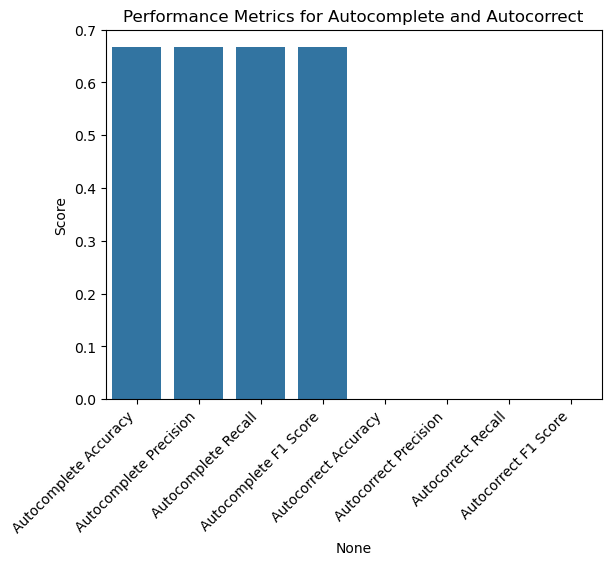

In [55]:
metrics = {
    'Autocomplete Accuracy': accuracy_autocomplete,
    'Autocomplete Precision': precision_autocomplete,
    'Autocomplete Recall': recall_autocomplete,
    'Autocomplete F1 Score': f1_autocomplete,
    'Autocorrect Accuracy': accuracy_autocorrect,
    'Autocorrect Precision': precision_autocorrect,
    'Autocorrect Recall': recall_autocorrect,
    'Autocorrect F1 Score': f1_autocorrect
}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])

sns.barplot(x=metrics_df.index, y=metrics_df['Score'])
plt.title('Performance Metrics for Autocomplete and Autocorrect')
plt.xticks(rotation=45, ha='right')
plt.show()

# Conclusion

In [70]:
# Summarize the project and suggest future improvements
print("Autocomplete and Autocorrect Data Analytics Project completed successfully!")

Autocomplete and Autocorrect Data Analytics Project completed successfully!
